# Practical Work: Recognizing Iris flowers

## Introduction

This first homework has to do with the classical problem of recognizing different species of Iris flowers relying on the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set).

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in his 1936 paper *"The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis"*.

* The data set consists of 50 samples from each of three species of Iris (*Iris setosa*, *Iris virginica* and *Iris versicolor*). 
* Four features were measured from each sample, the length and the width of the sepals and petals, in centimeters. 
* Based on the combination of these four features, Fisher developed a linear discriminant model to distinguish the species from each other.

Similarly, we will use this homework to get you familiarized with `numpy` and `scikit-learn`.

<div class="container-fluid">
  <div class="row">
      <div class="col-md-2" align='center'>
      </div>
      <div class='col-md-8' align='center'>
           <img src='https://s3.amazonaws.com/assets.datacamp.com/blog_assets/iris-machinelearning.png' />
      </div>
      <div class="col-md-2" align='center'></div>
  </div>
</div>

## Problem description

**If we want to design an algorithm to recognize iris species, what might the data be?**

* We need a 2D array of size `[n_samples x n_features]`.

    - What would the `n_samples` refer to?
    - What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

In [500]:
import numpy as np

In [501]:
# ploting support stuff
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
from ipywidgets import interact
seaborn.set_style('whitegrid')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Loading the Iris Data with `scikit-learn`

`scikit-learn` has a very straightforward set of data on these iris species.  The data consist of
the following:

* Features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

* Target classes to predict:
  1. Iris setosa
  2. Iris versicolour
  3. Iris virginica

``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [502]:
from sklearn.datasets import load_iris
iris_data = load_iris()

The resulting `iris_data` dataset is a `Bunch` object, that can be viewed as supercharged `dict`. For example, you can see what's available using the `keys()` method:

In [503]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Similarly, you can checkout the problem description that is attached to the dataset.

In [504]:
print(iris_data['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

`iris_data.data` contains the input data (our $X$'s) and `iris_data.target` contain the expected values (our $y$'s)

In [505]:
n_samples, n_features = iris_data.data.shape
print(n_samples)
print(n_features)
print(iris_data.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [506]:
print(iris_data.data.shape)
print(iris_data.target.shape)

(150, 4)
(150,)


In [507]:
print(iris_data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [508]:
print(iris_data.target_names)

['setosa' 'versicolor' 'virginica']


Let's visualize the relation between the attributes. If you are running the notebook locally you will be able to 

In [509]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

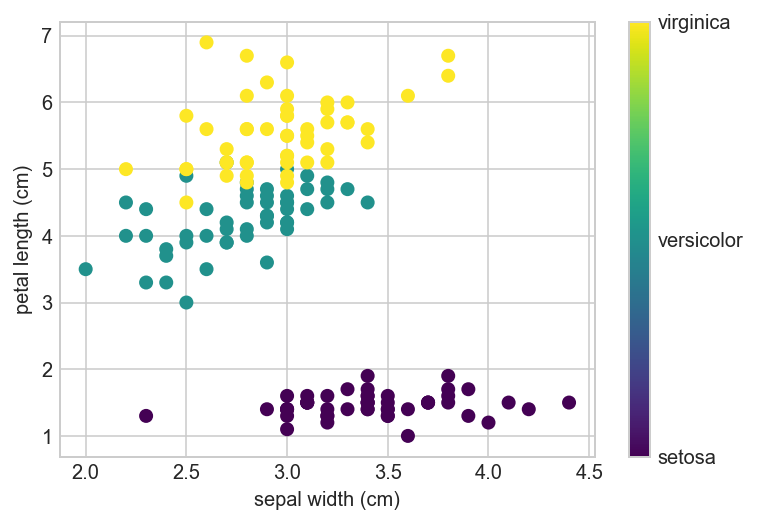

In [510]:
def plot_iris_scatter(x_feature_index, y_feature_index):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])

    plt.scatter(
        iris_data.data[:, x_feature_index],
        iris_data.data[:, y_feature_index],
        c=iris_data.target,
        cmap=cm.viridis)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris_data.feature_names[x_feature_index])
    plt.ylabel(iris_data.feature_names[y_feature_index])
interactive(plot_iris_scatter,x_feature_index=(0,3,1),y_feature_index=(1,3,1))

`seaborn` is another cool Python tool for creating nice-looking plots and figures. It includes some features that has to do with the Iris dataset.

In [511]:
df = seaborn.load_dataset("iris")

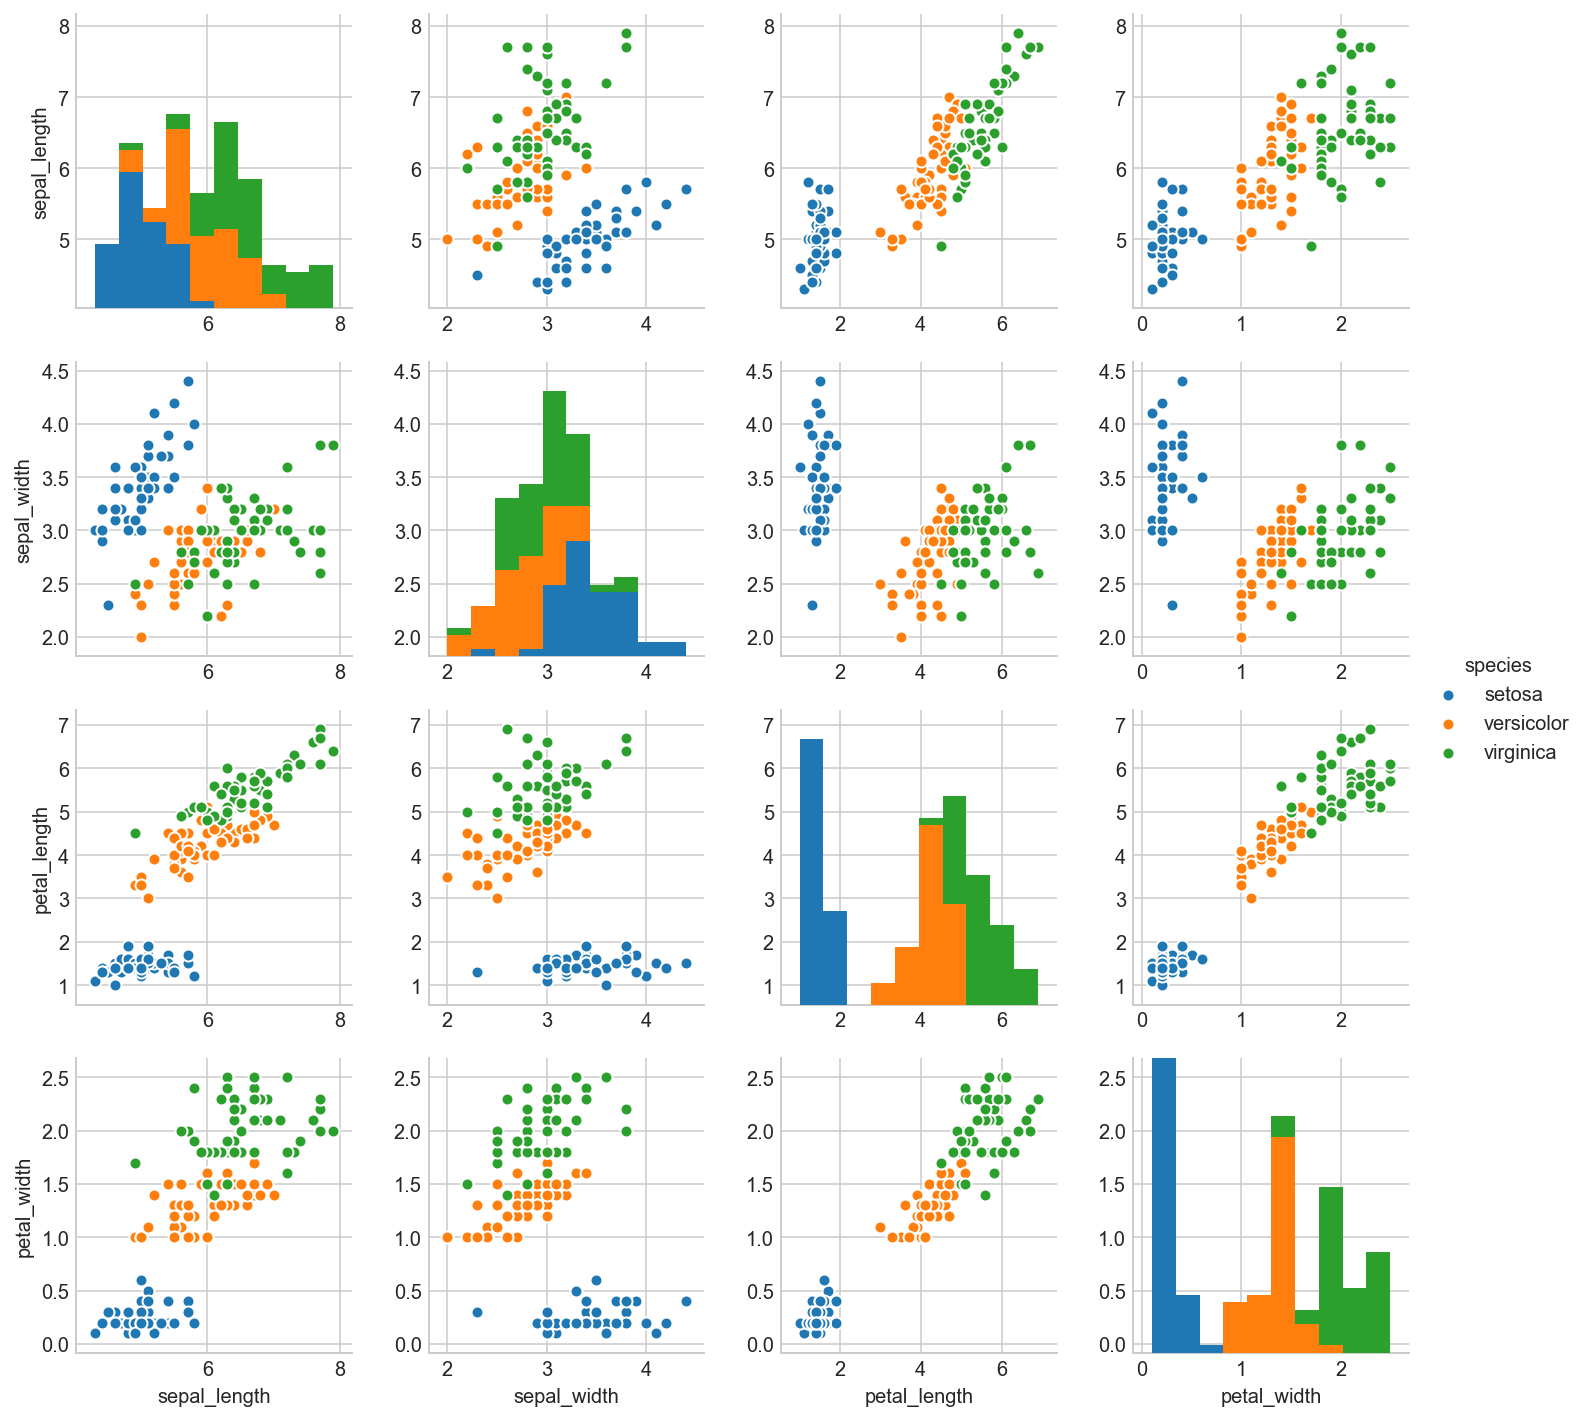

In [512]:
seaborn.pairplot(df, hue="species");

## Your task

* You have the data.
* Modify this Jupyter notebook, in particular,...
* you must implement a Multi-Layer Perceptron and **at least one other** machine learning method for recognizing the flowers in the iris dataset.
* Your algorithms must be `scikit-learn` estimators.
* Compare their performance.

Ask yourself some questions:

* What kind of problem is this?
* Must we transform the data?
* How would you implement the train/test/validation cycle for comparing .

# My implementations

## MLP implementation

During the MLP implementation the major source of doubt was: **Which optimization method should I use?** After some research, i found the following [work](http://ai.stanford.edu/~quocle/LeNgiCoaLahProNg11.pdf) by Quoc et al. that compares some methods, i was divided between:

- SGD
    - Familiar algorithm
    - easy to implement
- BFGS
    - harder to implement
    - quadratic convergence
    - heavy memory consumption
    - better for small data sets

After more investigation i found out that the scipy library already has a BFGS optimization function aware of memory consumption called *Limited-memory BFGS with bounded constraints* that produced a nice output during execution, so the list became:

- SGD
    - Familiar algorithm
    - easy to implement
- BFGS
    - ~~harder to implement~~
    - quadratic convergence
    - ~~heavy memory consumption~~
    - better for small data sets
    - verbose output

The following algorithm uses the BFGS.

The possible parameters are:
- alpha: float | L2 regularization term
- max_iter: Int | max iteration to the optimization algorithm
- hidden_layers_size: Tuple | size of each hidden layer ex.: (100,200,300) 1st hidden layer size: 100, 2nd hidden layer size: 200, 3rd hidden layer size: 300
- shuffle: Boolean | shuflle samples in interactions?
- random_state: State or Int |  state or seed for generating random number during shuffle
- tol: float | Loss tolerance for optimization

In [513]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin

In [514]:
from scipy.optimize import fmin_l_bfgs_b

from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import check_random_state, check_array, shuffle
from sklearn.utils.extmath import safe_sparse_dot

# transform the input X using a rectifier
def rectified_linear_unit(X):
    np.clip(X, 0, np.finfo(X.dtype).max, out=X)
    return X

# transform the input Z through the derivative of the rectified linear function 
def rectified_linear_unit_derivative(Z):
    return (Z > 0).astype(Z.dtype)

def log_loss(y_true, y_prob):
    y_prob = np.clip(y_prob, 1e-10, 1 - 1e-10)
    return -np.sum(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob)) / y_prob.shape[0]

# stack layers attributes to be used by the bfgs optmizer
def stack(layers_coef_, layers_intercept_):
    return np.hstack([l.ravel() for l in layers_coef_ + layers_intercept_])

# Remember to set the class name appropiately.
class MatheusAlvesMLP(BaseEstimator, ClassifierMixin):  # or RegressonMixin?
    def __init__(self, params=None):
        if params is None:
            self.ctor({})
        else:
            self.ctor(params)

    def ctor(self, params):
        self.alpha = params.get("alpha", 0.00001) # L2 regularization
        self.max_iter = params.get("max_iter", 500)# max iteration to the optimization algorithm
        self.hidden_layers_size = params.get("hidden_layers_size", (100,200,300))
        self.shuffle = params.get("shuffle", False) # shuflle samples in interactions?
        self.random_state = params.get("random_state",None) # state or seed for generating random number
        self.tol = params.get("tol", 1e-5)# Loss tolerance for optimization

        self.layers_coef = None
        self.layers_intercept = None
        self.cost = None
        self.n_iter = 0
        self.classes = None
        self.label_binarizer_ = LabelBinarizer()    

    def _unstack(self, stacked_parameters):
        for i in range(self.n_layers_ - 1):
            start, end, shape = self._coef_indptr[i]
            self.layers_coef[i] = np.reshape(stacked_parameters[start:end], shape)
            start, end = self._intercept_indptr[i]
            self.layers_intercept[i] = stacked_parameters[start:end]

    def _forward_pass(self, activations, with_output_activation=True):
        for i in range(self.n_layers_ - 1):
            activations[i + 1] = safe_sparse_dot(activations[i],self.layers_coef[i])
            activations[i + 1] += self.layers_intercept[i]

            # For the hidden layers
            if i + 1 != self.n_layers_ - 1:
                activations[i + 1] = rectified_linear_unit(activations[i + 1])

        # For the last layer
        if with_output_activation:
            activations[i + 1] = rectified_linear_unit(activations[i + 1])
        return activations

    def _compute_cost_grad(self, layer, n_samples, activations, deltas, coef_grads, intercept_grads):
        coef_grads[layer] = safe_sparse_dot(activations[layer].T, deltas[layer])
        coef_grads[layer] += (self.alpha * self.layers_coef[layer])
        coef_grads[layer] /= n_samples

        intercept_grads[layer] = np.mean(deltas[layer], 0)

        return coef_grads, intercept_grads

    def _cost_grad_lbfgs(self, stacked_coef_inter, X, y, activations, deltas, coef_grads, intercept_grads):
        self._unstack(stacked_coef_inter)
        cost, coef_grads, intercept_grads = self._backprop(X, y, activations, deltas, coef_grads, intercept_grads)
        self.n_iter += 1
        grad = stack(coef_grads, intercept_grads)
        return cost, grad

    def _backprop(self, X, y, activations, deltas, coef_grads,intercept_grads):
        n_samples = X.shape[0]

        # Forward propagate
        activations = self._forward_pass(activations)

        # Get cost using log loss function
        cost = log_loss(y, activations[-1])

        # Add regularization term to the cost
        values = np.sum(np.array([np.sum(s ** 2) for s in self.layers_coef]))
        cost += (0.5 * self.alpha) * values / n_samples

        # Backward propagate
        last = self.n_layers_ - 2
        diff = y - activations[-1]
        deltas[last] = -diff

        # Compute gradient for the last layer
        coef_grads, intercept_grads = self._compute_cost_grad(last, n_samples,
                                                              activations,
                                                              deltas,
                                                              coef_grads,
                                                              intercept_grads)

        # Iterate over the hidden layers
        for i in range(self.n_layers_ - 2, 0, -1):
            deltas[i - 1] = safe_sparse_dot(deltas[i],self.layers_coef[i].T)
            deltas[i - 1] *= rectified_linear_unit_derivative(activations[i])
            coef_grads, intercept_grads = self._compute_cost_grad(i - 1,
                                                          n_samples,
                                                          activations,
                                                          deltas,
                                                          coef_grads,
                                                          intercept_grads)
        return cost, coef_grads, intercept_grads   

    def fit(self, X, y):
        hidden_layers_size = list(self.hidden_layers_size)
        n_samples, n_features = X.shape
        self.label_binarizer_.fit(y)

        if self.classes is None:
            self.classes = self.label_binarizer_.classes_
        else:
            classes = self.label_binarizer_.classes_

        y = self.label_binarizer_.transform(y)
        self.n_outputs = y.shape[1]
        layer_units = ([n_features] + hidden_layers_size +
                       [self.n_outputs])

        # If it is the first time training the model
        if self.layers_coef is None:
            # Initialize parameters
            self.n_outputs = y.shape[1]

            # Compute the number of layers
            self.n_layers_ = len(layer_units)

            # Initialize coefficient and intercept layers
            self.layers_coef = []
            self.layers_intercept = []

            for i in range(self.n_layers_ - 1):
                rng = check_random_state(self.random_state)
                n_fan_in = layer_units[i]
                n_fan_out = layer_units[i + 1]

                # Use the Gorot initialization method
                weight_init_bound = np.sqrt(6. / (n_fan_in + n_fan_out))
                self.layers_coef.append(rng.uniform(-weight_init_bound,
                                                     weight_init_bound,
                                                     (n_fan_in, n_fan_out)))
                self.layers_intercept.append(rng.uniform(-weight_init_bound,
                                                          weight_init_bound,
                                                          n_fan_out))
        if self.shuffle:
            X, y = shuffle(X, y, random_state=self.random_state)

        # Initialize lists
        activations = [X]
        activations.extend(np.empty((n_samples, n_fan_out))
                           for n_fan_out in layer_units[1:])

        deltas = [np.empty_like(a_layer) for a_layer in activations]
        coef_grads = [np.empty((n_fan_in, n_fan_out)) for n_fan_in, n_fan_out in zip(layer_units[:-1], layer_units[1:])]

        intercept_grads = [np.empty(n_fan_out) for n_fan_out in layer_units[1:]]
        
        # START LBFGS algorithm
        # Store meta information for the parameters
        self._coef_indptr = []
        self._intercept_indptr = []
        start = 0

        # Save sizes and indices of coefficients for faster unstacking
        for i in range(self.n_layers_ - 1):
            n_fan_in, n_fan_out = layer_units[i], layer_units[i + 1]

            end = start + (n_fan_in * n_fan_out)
            self._coef_indptr.append((start, end, (n_fan_in, n_fan_out)))
            start = end

        # Save sizes and indices of intercepts for faster unstacking
        for i in range(self.n_layers_ - 1):
            end = start + layer_units[i + 1]
            self._intercept_indptr.append((start, end))
            start = end

        # enable pretty output for l_bfgs_b
        iprint = 1
        
        # Run L-BFGS_B opitimization
        stacked_coef_inter = stack(self.layers_coef, self.layers_intercept)

        optimal_parameters, self.cost, d = fmin_l_bfgs_b(
            x0=stacked_coef_inter,
            func=self._cost_grad_lbfgs,
            maxfun=self.max_iter,
            iprint=iprint,
            pgtol=self.tol,
            args=(X, y, activations, deltas, coef_grads, intercept_grads))

        self._unstack(optimal_parameters)

        return self  

    def decision_function(self, X):
        hidden_layers_size = list(self.hidden_layers_size)

        layer_units = [X.shape[1]] + hidden_layers_size + [self.n_outputs]

        # Initialize layers
        activations = []
        activations.append(X)

        for i in range(self.n_layers_ - 1):
            activations.append(np.empty((X.shape[0],layer_units[i + 1])))
        # forward propagate
        self._forward_pass(activations, with_output_activation=False)
        y_pred = activations[-1]

        if self.n_outputs == 1:
            return y_pred.ravel()
        else:
            return y_pred

    def predict(self, X):
        y_scores = self.decision_function(X)
        y_scores = rectified_linear_unit(y_scores)

        return self.label_binarizer_.inverse_transform(y_scores)

## Other method implementation

For the other method implementation the original idea was to implement a super class of NaiveBayes and several of its specifications, but it felt more natural to begun with a specific algorithm and later expand it.

The following algorithm is a implementation of the Gaussian Naive-Bayes algorithm using joint log to get the likelihood

In [515]:
# Remember to set the class name appropiately.
class MatheusAlvesGaussianNaiveBayers(BaseEstimator, ClassifierMixin):  # or RegressonMixin?
    
    def __init__(self, params=None):
        'If params is None the method is initialized with default values.'
        pass
    
    def predict(self, X):
        jll = self.joint_log_likelihood(X)
        y_pred = self.unique_y[np.argmax(jll, axis=1)]
        return y_pred

    def fit(self, X, y):
        self.unique_y = unique_y = np.unique(y)
        n_classes = unique_y.shape[0]
        _, n_features = X.shape

        self.theta = np.empty((n_classes, n_features))
        self.sigma = np.empty((n_classes, n_features))
        self.class_prior = np.empty(n_classes)
        for i, y_i in enumerate(unique_y):
            self.theta[i, :] = np.mean(X[y == y_i, :], axis=0)
            self.sigma[i, :] = np.var(X[y == y_i, :], axis=0)
            self.class_prior[i] = np.float(np.sum(y == y_i)) / n_classes
        return self

    def joint_log_likelihood(self, X):
        X = np.atleast_2d(X)
        joint_log_likelihood = []
        for i in range(np.size(self.unique_y)):
            jointi = np.log(self.class_prior[i])
            n_ij = - 0.5 * np.sum(np.log(np.pi * self.sigma[i, :]))
            n_ij -= 0.5 * np.sum(((X - self.theta[i, :]) ** 2) / (self.sigma[i, :]), 1)
            joint_log_likelihood.append(jointi + n_ij)
        joint_log_likelihood = np.array(joint_log_likelihood).T
        return joint_log_likelihood
    

# Separating training and validation sets from the iris dataset

In [516]:
from random import sample
chosen_indexes = sample(range(0,149),105)
training_data = []
training_target = []
validation_data = []
validation_target = []
for i in range(0,149):
    if i in chosen_indexes:
        training_data.append(iris_data.data[i])
        training_target.append(iris_data.target[i])
    else:
        validation_data.append(iris_data.data[i])
        validation_target.append(iris_data.target[i])
training_data=np.asarray(training_data)
training_target=np.asarray(training_target)
validation_data=np.asarray(validation_data)
validation_target=np.asarray(validation_target)

# Results of Gaussian Naive-Bayers

In [517]:
from sklearn.metrics import accuracy_score
classifier = MatheusAlvesGaussianNaiveBayers()
# training 
classifier.fit(training_data,training_target)
#validating
predict = classifier.predict(validation_data)
print("Classifier Accuracy: {:f}".format(accuracy_score(validation_target,predict)))

Classifier Accuracy: 0.977273


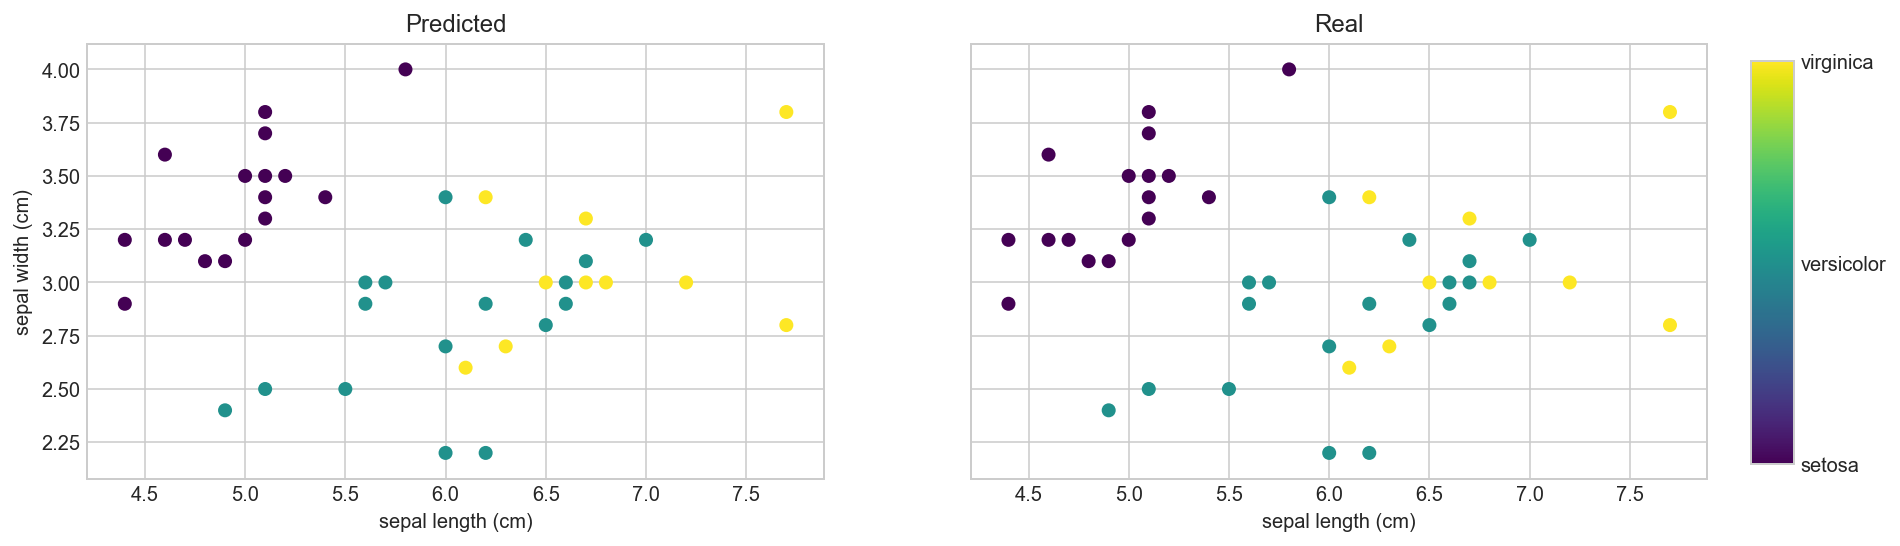

In [518]:
@interact(x_feature_index=(0, 3), y_feature_index=(0, 3))
def plot_iris_scatter(x_feature_index=0, y_feature_index=1):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    ax1.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=predict,
        cmap=cm.viridis)
    ax1.set_title("Predicted")
    pos2 = ax2.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=validation_target,
        cmap=cm.viridis)
    ax2.set_title("Real")
    f.subplots_adjust(right=2)
    cbar_ax = f.add_axes([2.05, 0.15, 0.05, 0.7])
    ax1.set_xlabel(iris_data.feature_names[x_feature_index])
    ax2.set_xlabel(iris_data.feature_names[x_feature_index])
    ax1.set_ylabel(iris_data.feature_names[y_feature_index])
    f.colorbar(pos2,cax=cbar_ax,format=formatter,ticks=[0,1,2])

# Results of the MLP with the LBFGS algorithm

In [519]:
from wurlitzer import sys_pipes
classifier = MatheusAlvesMLP()
with sys_pipes():
    # training 
    classifier.fit(training_data,training_target)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        81903     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30259D+01    |proj g|=  5.70821D-01

At iterate    1    f=  1.79942D+00    |proj g|=  2.09020D-01

At iterate    2    f=  1.61361D+00    |proj g|=  2.55771D-01

At iterate    3    f=  1.42816D+00    |proj g|=  1.20436D-01

At iterate    4    f=  1.35554D+00    |proj g|=  7.68525D-02

At iterate    5    f=  1.21209D+00    |proj g|=  7.26035D-02


 This problem is unconstrained.



At iterate    6    f=  9.62746D-01    |proj g|=  6.52398D-02

At iterate    7    f=  8.59559D-01    |proj g|=  1.30655D-01

At iterate    8    f=  8.00398D-01    |proj g|=  9.67549D-02

At iterate    9    f=  7.71919D-01    |proj g|=  1.04154D-01

At iterate   10    f=  6.68154D-01    |proj g|=  1.31522D-01

At iterate   11    f=  6.29636D-01    |proj g|=  4.49048D-02

At iterate   12    f=  6.14474D-01    |proj g|=  4.87829D-02

At iterate   13    f=  5.91599D-01    |proj g|=  5.59407D-02

At iterate   14    f=  5.40130D-01    |proj g|=  4.47014D-02

At iterate   15    f=  4.69715D-01    |proj g|=  6.76887D-02

At iterate   16    f=  4.28063D-01    |proj g|=  7.67298D-02

At iterate   17    f=  4.07442D-01    |proj g|=  5.99994D-02

At iterate   18    f=  3.68682D-01    |proj g|=  8.35332D-02

At iterate   19    f=  3.34635D-01    |proj g|=  8.61846D-02

At iterate   20    f=  2.73706D-01    |proj g|=  6.05602D-02

At iterate   21    f=  2.53298D-01    |proj g|=  8.01712D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after 20 function
  and gradient evaluations.  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
81903     23     70      2     0     0   5.056D-02   2.147D-01
  F =  0.21469762965116126     

ABNORMAL_TERMINATION_IN_LNSRCH                              

 Cauchy                time 0.000E+00 seconds.
 Subspace minimization time 0.000E+00 seconds.
 Line search           time 0.000E+00 seconds.

 Total User time 0.000E+00 seconds.



In [520]:
# validating
predict = classifier.predict(validation_data)
print("Classifier Accuracy: {:f}".format(accuracy_score(validation_target,predict)))

Classifier Accuracy: 0.977273


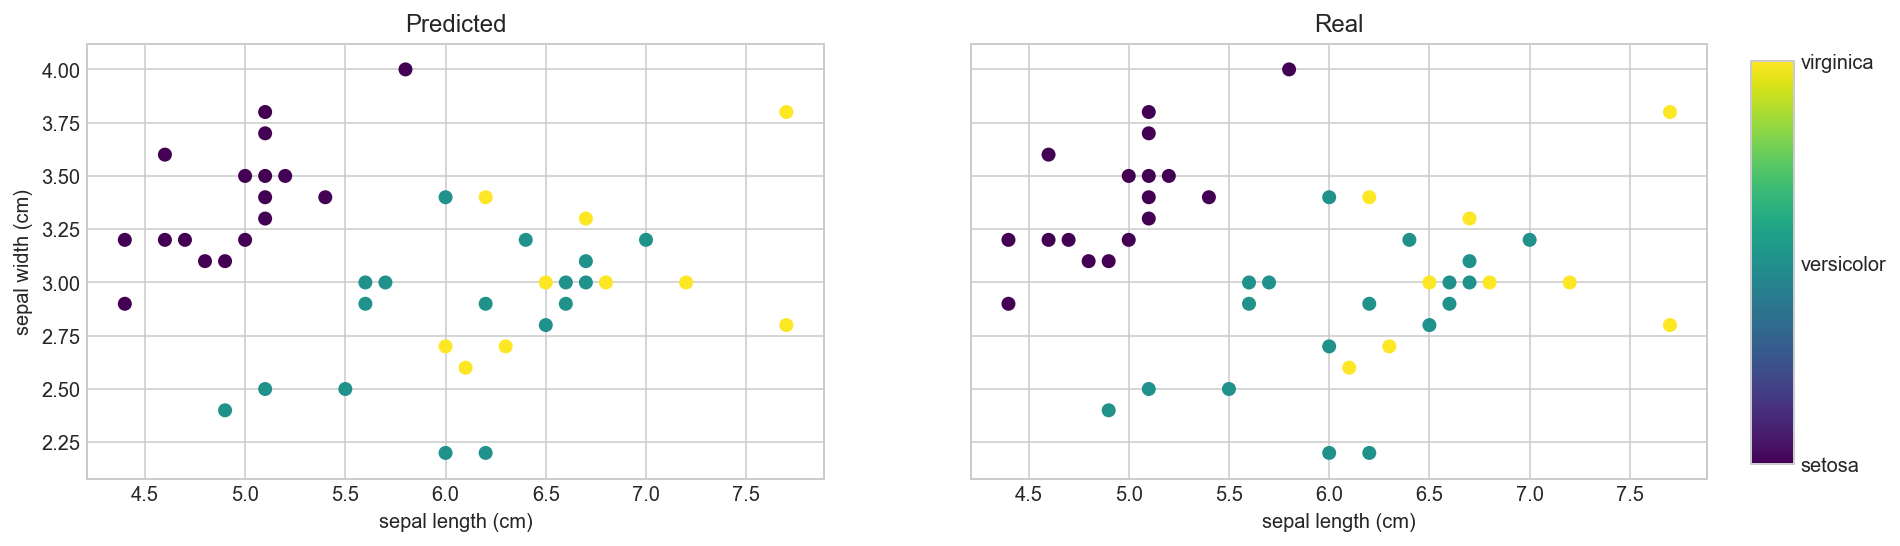

In [521]:
@interact(x_feature_index=(0, 3), y_feature_index=(0, 3))
def plot_iris_scatter(x_feature_index=0, y_feature_index=1):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(
        lambda i, *args: iris_data.target_names[int(i)])
    f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
    ax1.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=predict,
        cmap=cm.viridis)
    ax1.set_title("Predicted")
    pos2 = ax2.scatter(
        validation_data[:, x_feature_index],
        validation_data[:, y_feature_index],
        c=validation_target,
        cmap=cm.viridis)
    ax2.set_title("Real")
    f.subplots_adjust(right=2)
    cbar_ax = f.add_axes([2.05, 0.15, 0.05, 0.7])
    ax1.set_xlabel(iris_data.feature_names[x_feature_index])
    ax2.set_xlabel(iris_data.feature_names[x_feature_index])
    ax1.set_ylabel(iris_data.feature_names[y_feature_index])
    f.colorbar(pos2,cax=cbar_ax,format=formatter,ticks=[0,1,2])

Bear in mind:

* Prepare the Jupyter notebook describing your work and showing your results -> **plots are expected!**
* Do not used any pre-existing library (like Keras, theano, Tensoflow, etc.) for programming your algorithms.
* You may use them for support but not for the algorithm itself.
* `params` is a dictionary with the configuration of the algorithm: layers, number of nodes in each layer, activation functions, learning rates, etc.
* See `scikit-learn` docs on how to [implement an estimator](http://scikit-learn.org/stable/developers/contributing.html#rolling-your-own-estimator).

# Submission

Submit your notebook files via Google Classroom.

<hr/>
<div class="container-fluid">
  <div class='well'>
      <div class="row">
          <div class="col-md-3" align='center'>
              <img align='center'alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png"/>
          </div>
          <div class="col-md-9">
              This work is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-nc-sa/4.0/).
          </div>
      </div>
  </div>
</div>

In [522]:
%load_ext version_information
%version_information numpy, matplotlib, sklearn

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.6.2 64bit [GCC 7.1.1 20170630]
IPython 6.1.0
OS Linux 4.13.5 1 ARCH x86_64 with arch
numpy 1.13.1
matplotlib 2.1.0
sklearn 0.19.0
Fri Oct 20 00:51:41 2017 -02

In [523]:
# this code is here for cosmetic reasons
from IPython.core.display import HTML
from urllib.request import urlopen
HTML(urlopen('https://raw.githubusercontent.com/lmarti/jupyter_custom/master/custom.include').read().decode('utf-8'))

---